---
title: "NYCTaxi"
author: "심채연(2018-21971)"
format: dashboard
execute: 
  enabled: true
  cache: false
  freeze: false
---

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.io as pio

In [3]:
pd.options.plotting.backend = "plotly"
pio.templates.default = "plotly_white"

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/DV2023/main/posts/NYCTaxi.csv").assign(
    log_trip_duration = lambda df: np.log(df.trip_duration),
    pickup_datetime = lambda df: df.pickup_datetime.apply(pd.to_datetime),
    dropoff_datetime = lambda df: df.dropoff_datetime.apply(pd.to_datetime),
    dist = lambda df: np.sqrt((df.pickup_latitude-df.dropoff_latitude)**2 + (df.pickup_longitude-df.dropoff_longitude)**2),
    #---#
    vendor_id = lambda df: df.vendor_id.map({1:'A',2:'B'})
).assign(
    speed = lambda df: df.dist / df.trip_duration,
    pickup_hour = lambda df: df.pickup_datetime.dt.hour,
    dropoff_hour = lambda df: df.dropoff_datetime.dt.hour,
    dayofweek = lambda df: df.pickup_datetime.dt.dayofweek, 
    dayofweek_kr=lambda df: df.pickup_datetime.dt.dayofweek.map(lambda x: {0: '월', 1: '화', 2: '수', 3: '목', 4: '금', 5: '토', 6: '일'}.get(x))
)
df_small = df[::100].reset_index(drop=True)

## `(1)` 요일,시간에 따른 평균속력 시각화 – 25점

자료 `df`에서 시간에 따른 평균속력을 구하고 이를 대시보드에 시각화하라.

**README**

-   요일은 `{0:'월',1:'화',2:'수',3:'목',4:'금',5:'토',6:'일'}`의 규칙에
    따라 변환할 것


In [18]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,dist,speed,pickup_hour,dropoff_hour,dayofweek,dayofweek_kr
0,id2875421,B,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,6.120297,0.017680,0.000039,17,17,0,월
1,id3194108,A,2016-06-01 11:48:41,2016-06-01 12:19:07,1,-74.005028,40.746452,-73.972008,40.745781,N,1826,7.509883,0.033027,0.000018,11,12,2,수
2,id3564028,A,2016-01-02 01:16:42,2016-01-02 01:19:56,1,-73.954132,40.774784,-73.947418,40.779633,N,194,5.267858,0.008282,0.000043,1,1,5,토
3,id1660823,B,2016-03-01 06:40:18,2016-03-01 07:01:37,5,-73.982140,40.775326,-74.009850,40.721699,N,1279,7.153834,0.060363,0.000047,6,7,1,화
4,id1575277,B,2016-06-11 16:59:15,2016-06-11 17:33:27,1,-73.999229,40.722881,-73.982880,40.778297,N,2052,7.626570,0.057778,0.000028,16,17,5,토


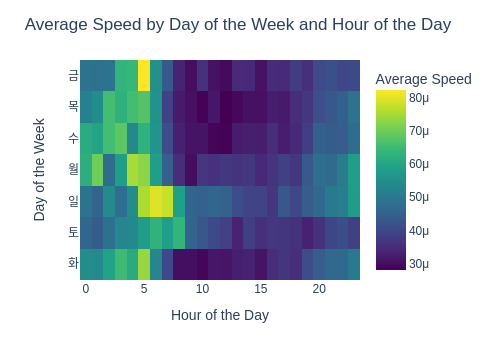

In [20]:
pivot_table = df.pivot_table(values='speed', index='dayofweek_kr', columns='pickup_hour', aggfunc='mean')

fig = px.imshow(pivot_table, labels=dict(color="Average Speed"), x=pivot_table.columns, y=pivot_table.index,
                color_continuous_scale='Viridis')

fig.update_layout(
    xaxis_title="Hour of the Day",
    yaxis_title="Day of the Week",
    title="Average Speed by Day of the Week and Hour of the Day"
)

fig.show()

## `(2)` 요일,시간에 따른 평균이동거리 시각화 – 25점

자료 `df`에서 시간에 따른 평균이동거리를 구하고 이를 대시보드에
시각화하라.

**README**

-   요일은 `{0:'월',1:'화',2:'수',3:'목',4:'금',5:'토',6:'일'}`의 규칙에
    따라 변환할 것

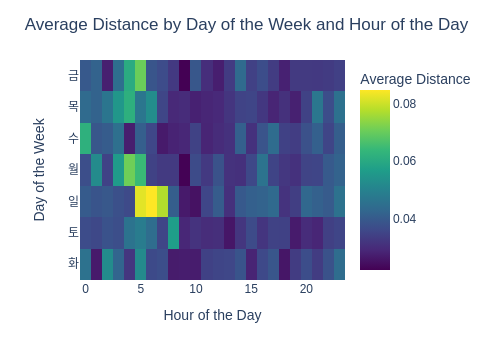

In [24]:
pivot_table = df.pivot_table(values='dist', index='dayofweek_kr', columns='pickup_hour', aggfunc='mean')

fig = px.imshow(pivot_table, labels=dict(color="Average Distance"), x=pivot_table.columns, y=pivot_table.index,
                color_continuous_scale='Viridis')

fig.update_layout(
    xaxis_title="Hour of the Day",
    yaxis_title="Day of the Week",
    title="Average Distance by Day of the Week and Hour of the Day"
)

fig.show()

## `(3)` 속력별 경로시각화 – 50점

자료 `df_small`에서 속력을 quatile에 따라 4개의 구간으로 나누고, 구간별
이동경로를 대시보드에 시각화하라.

**README**

-   Zoom = 11 로 설정할것. Figure의 width, height는 설정하지 말것
-   기타 설정값에 대해서는 궁금한것이 있다면 질문할 것

**힌트**:

*힌트1*: 아래의 코드를 관찰하세요.

In [5]:
speed = pd.Series([1,1,2,2,3,3,4,4])
print(pd.qcut(speed,4))
print(pd.qcut(speed,4,labels=['매우느림','조금느림','조금빠름','매우빠름']))

0    (0.999, 1.75]
1    (0.999, 1.75]
2      (1.75, 2.5]
3      (1.75, 2.5]
4      (2.5, 3.25]
5      (2.5, 3.25]
6      (3.25, 4.0]
7      (3.25, 4.0]
dtype: category
Categories (4, interval[float64, right]): [(0.999, 1.75] < (1.75, 2.5] < (2.5, 3.25] < (3.25, 4.0]]
0    매우느림
1    매우느림
2    조금느림
3    조금느림
4    조금빠름
5    조금빠름
6    매우빠름
7    매우빠름
dtype: category
Categories (4, object): ['매우느림' < '조금느림' < '조금빠름' < '매우빠름']


In [11]:
df_small = df_small.assign(speed_quantile=lambda df: pd.qcut(df['speed'], 4, labels=['매우느림', '조금느림', '조금빠름', '매우빠름']))

In [14]:
df_small.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'log_trip_duration', 'dist', 'speed', 'pickup_hour',
       'dropoff_hour', 'dayofweek', 'dayofweek_kr', 'speed_quantile'],
      dtype='object')

In [24]:
df_small.shape

(146, 19)

/root/anaconda3/envs/dv2023/lib/python3.10/site-packages/plotly/express/_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



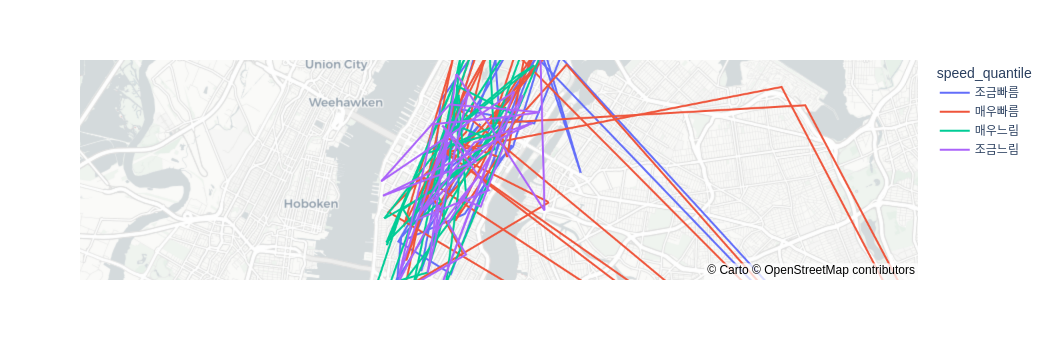

In [23]:
fig3 = px.line_mapbox(
    data_frame=df_small,
    lat='pickup_latitude',
    lon='pickup_longitude',
    color='speed_quantile',
    line_group='speed_quantile',
    mapbox_style='carto-positron',
    zoom=11
)

for trace in scatter_data:
    fig.add_trace(trace)

fig3.show()


**힌트**:

*힌트2*: 1-(3)에 해당하는 그림을 fig3로 저장한후 아래의 코드를 관찰하세요



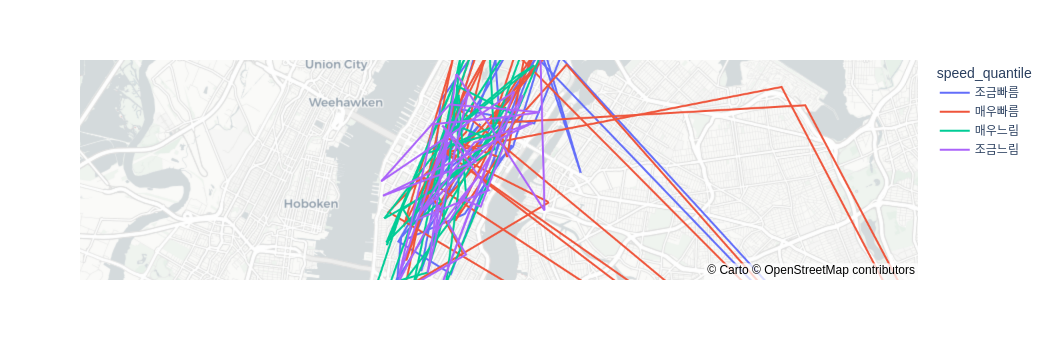

In [25]:
fig3

In [32]:
for i in np.arange(len(df_small)):
    print(fig3.data[i].mode)

lines
lines
lines
lines


IndexError: tuple index out of range

In [36]:
fig3.data[3].mode

'lines'